In [210]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/ruiwu1990/CSCI_4120/master/KNN/iris.data'
df = pd.read_csv(url, header=None)
print(df.head())

     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


In [225]:
import pandas as pd
import random


def loadDataset(filename, split):
	trainingSet=[]
	testSet=[]
	df = pd.read_csv(url, header=None)
	array = df.to_numpy()
	random.shuffle(array)
	training_len = int(len(array)*split)
	trainingSet = array[:training_len]
	testSet = array[training_len:]
	return trainingSet, testSet

In [226]:
# Load and format data

from sklearn import preprocessing

trainingSet=[]
testSet=[]
trainingSet, testSet = loadDataset(url, 0.66)
#print(len(trainingSet))
#print(len(testSet))

# separate data
xTraining = trainingSet[:,(0,1,2,3)]
yTraining = trainingSet[:,4]
xTest = testSet[:,(0,1,2,3)]
yTest = testSet[:,4]

# encode classifications
le = preprocessing.LabelEncoder()
le.fit(yTraining)
le.fit(yTest)
list(le.classes_)
yTrainingTrans = le.fit_transform(yTraining)
yTestTrans = le.fit_transform(yTest)

#print(yTrainingTrans)
#print(yTestTrans)

In [227]:
# calculate predictions and accuracies

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

kAccuracyArr=[]
n = 10
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]:
  k=i
  accuracy=0
  for j in range(n):
    neigh = KNeighborsClassifier(k)
    neigh.fit(xTraining, yTrainingTrans)
    prediction = neigh.predict(xTest)
    #print("Accuracy (k = ", k, "): ", metrics.accuracy_score(yTestTrans, prediction))
    accuracy = accuracy + metrics.accuracy_score(yTestTrans, prediction)*100

  kAccuracyArr.append(accuracy/n)


print(kAccuracyArr)
print()
print("Maximum Accuracy: ", max(kAccuracyArr))
print("Best value for k: ", np.argmax(kAccuracyArr) + 1)

[82.3529411764706, 82.3529411764706, 82.3529411764706, 82.3529411764706, 82.3529411764706, 82.3529411764706, 82.3529411764706, 82.3529411764706, 82.3529411764706, 82.3529411764706, 82.3529411764706, 82.3529411764706, 82.3529411764706, 82.3529411764706, 82.3529411764706, 80.3921568627451, 80.3921568627451, 80.3921568627451, 80.3921568627451, 80.3921568627451]

Maximum Accuracy:  82.3529411764706
Best value for k:  1


<function matplotlib.pyplot.show>

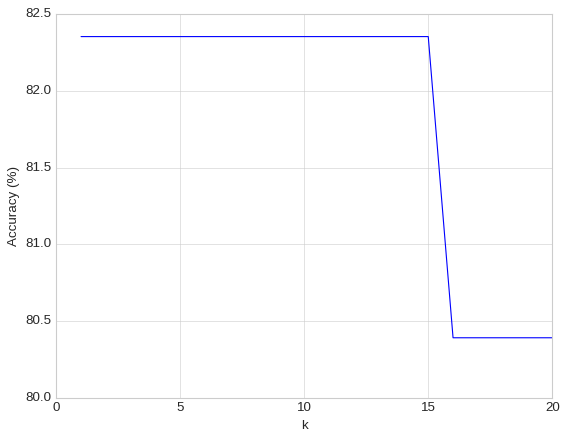

In [228]:
# plot k vs. accuracy

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

#x = np.linspace(0,20,)

x = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
y = kAccuracyArr

plt.plot(x,y)
plt.xlabel("k")
plt.ylabel("Accuracy (%)")
plt.show